<a href="https://colab.research.google.com/github/menna03/Titanic-dataset/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

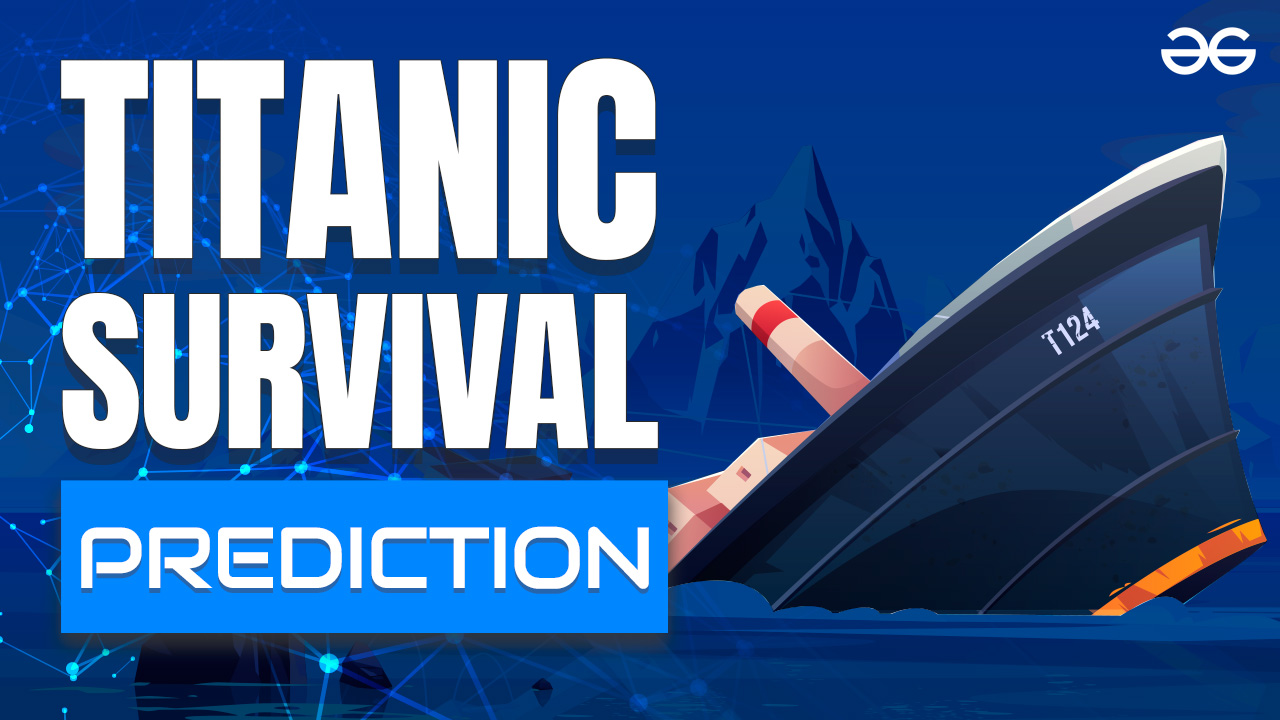

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
Test = pd.read_csv('/content/tested.csv')

In [5]:
Test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
Test.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
Test.duplicated().sum()


0

In [8]:
Test.isna().sum()* 100 / len(Test)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

As we can see, the "Cabin" column has 78.229665 null values, so it will be useless and not accurate at all. Therefore, we will drop it.

In [9]:
Test = Test.drop(columns=['Cabin'])


We can fill the rest of the null values with the mean.


In [10]:
Test['Age'] = Test['Age'].fillna(Test['Age'].mean())
Test['Fare'] = Test['Fare'].fillna(Test['Fare'].mean())

In [11]:
Test['Age'] = Test['Age'].astype(int)


In [12]:
Test.isna().sum()* 100 / len(Test)


PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [13]:
Test.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [14]:
Test['Fare']=pd.to_numeric(Test['Fare'], errors='coerce')

Test['Ticket']=pd.to_numeric(Test['Ticket'], errors='coerce')


In [15]:
Test.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked        object
dtype: object

In [16]:
Test.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,2.960000e+02,418.000000
mean,1100.500000,0.363636,2.265550,30.191388,0.447368,0.392344,2.238510e+05,35.627188
std,120.810458,0.481622,0.841838,12.654104,0.896760,0.981429,3.695238e+05,55.840500
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.800000e+02,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,1.747225e+04,7.895800
50%,1100.500000,0.000000,3.000000,30.000000,0.000000,0.000000,2.301360e+05,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,3.470815e+05,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,3.101298e+06,512.329200


In [17]:
Test.shape


(418, 11)

In [18]:
Test.Sex.value_counts()



male      266
female    152
Name: Sex, dtype: int64

In [19]:
Test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

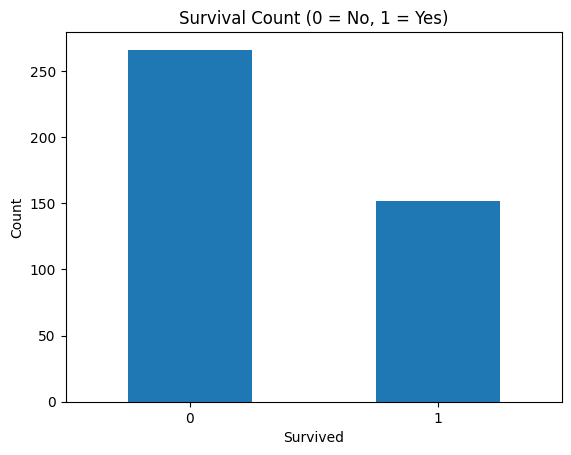

In [20]:
column = 'Survived'

# Create a bar chart
survival_counts = Test[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

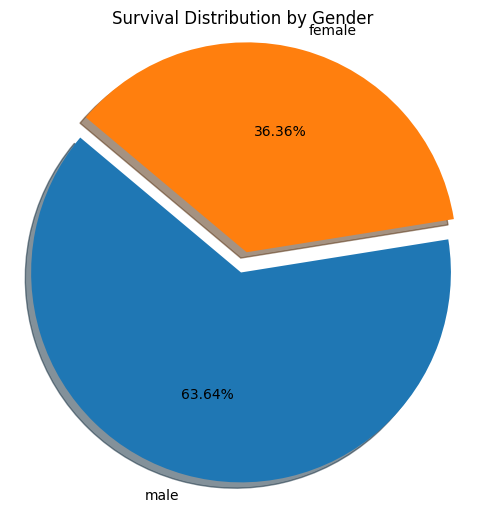

In [21]:
survived_counts = Test['Survived'].value_counts()
sex_labels = Test['Sex'].value_counts().index
myexplode = [0.1, 0]  # To explode the first slice (index 0)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=sex_labels, explode=myexplode, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Survival Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

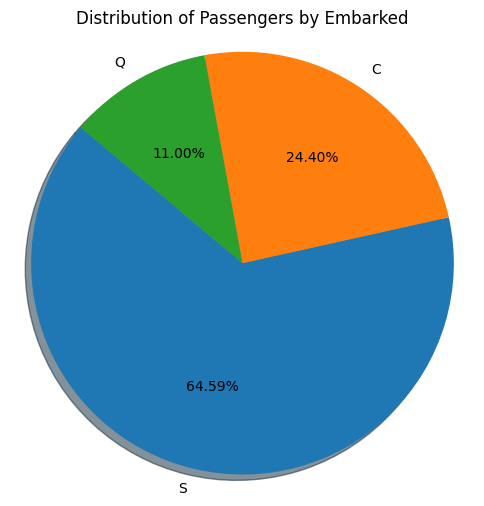

In [22]:
embarked_counts = Test['Embarked'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Distribution of Passengers by Embarked')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

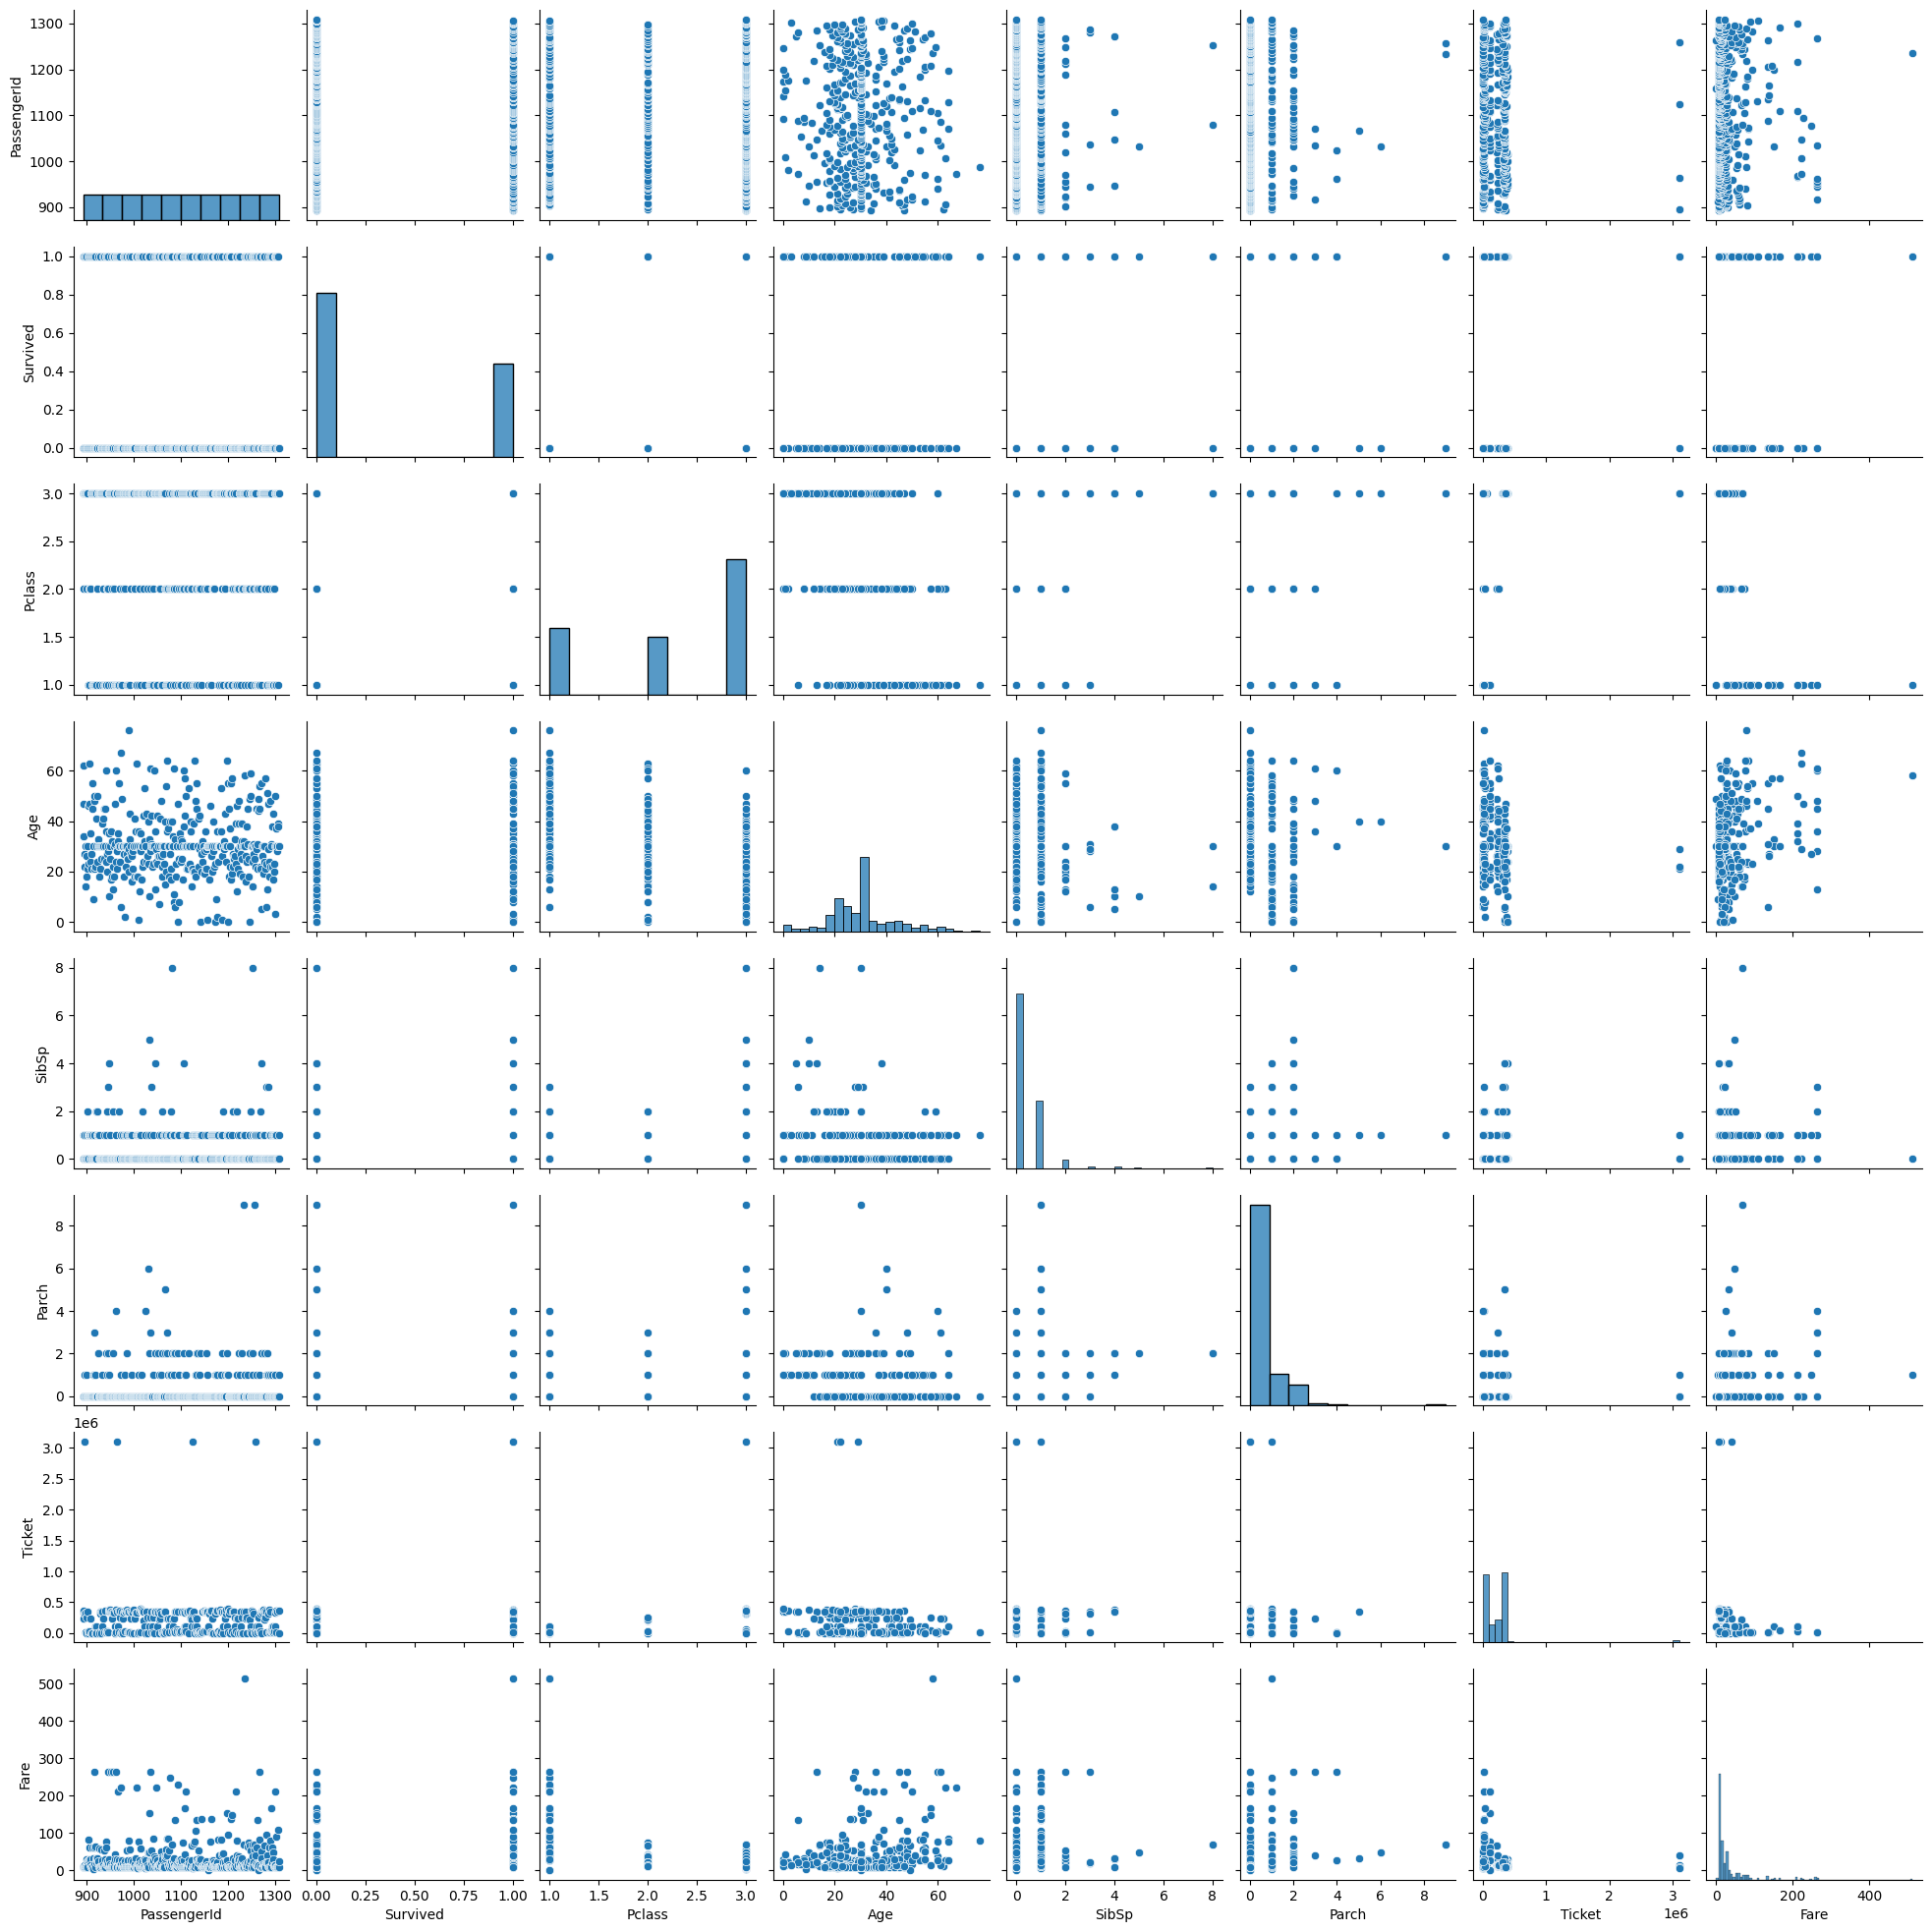

In [23]:
sns.pairplot(Test)

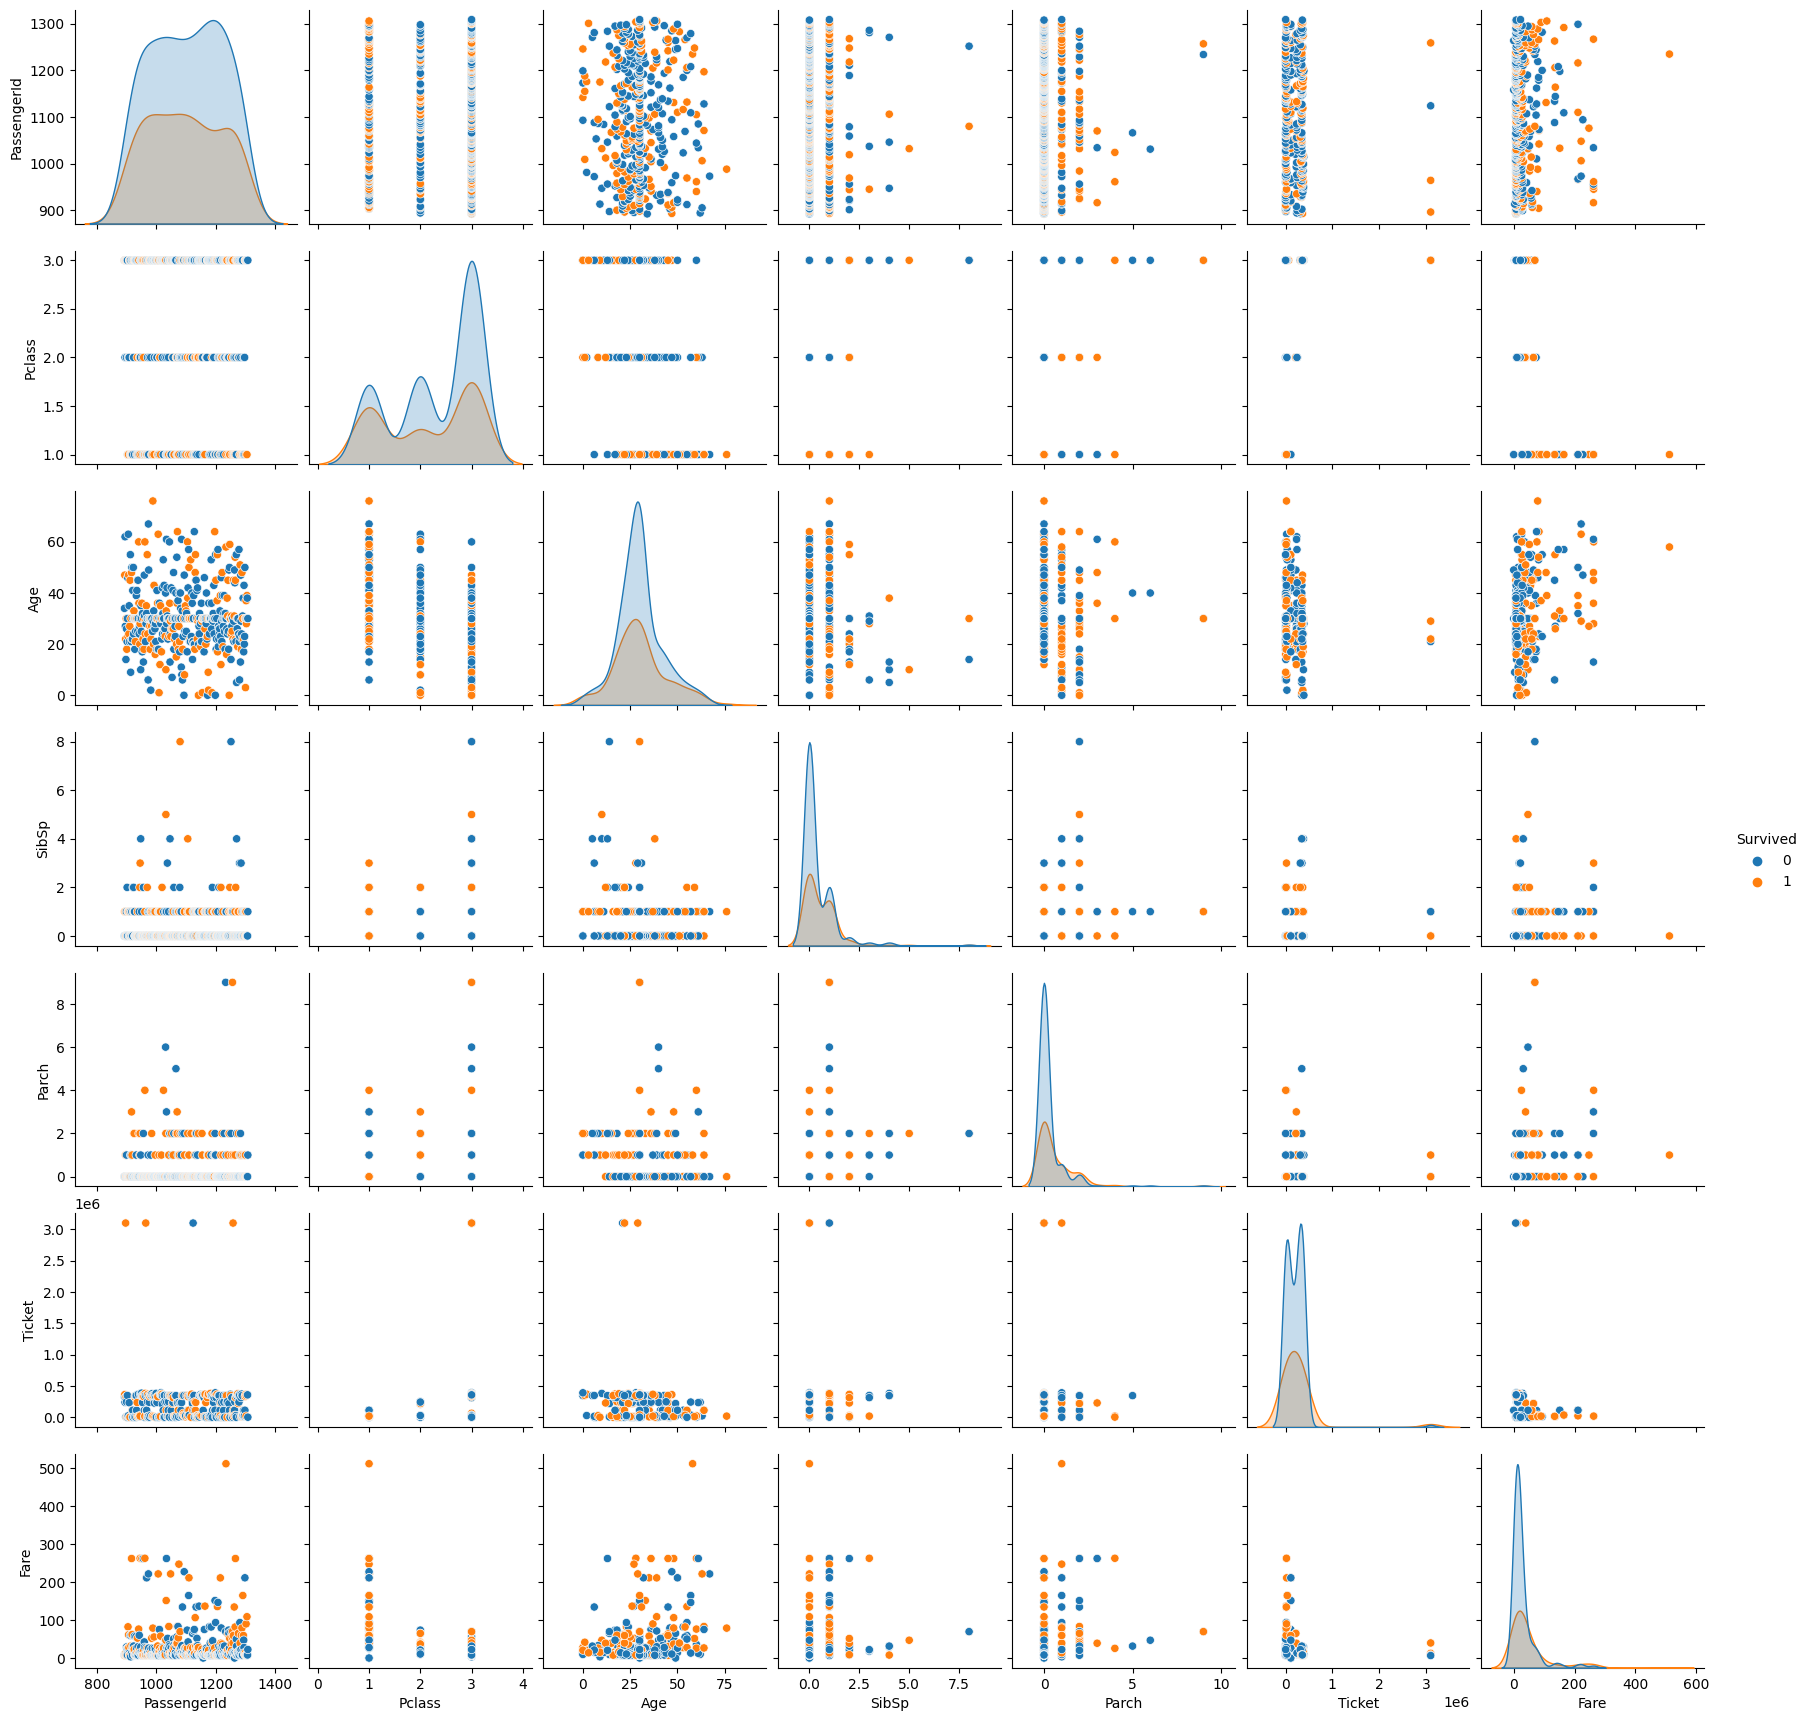

In [24]:
sns.pairplot(Test, hue='Survived')


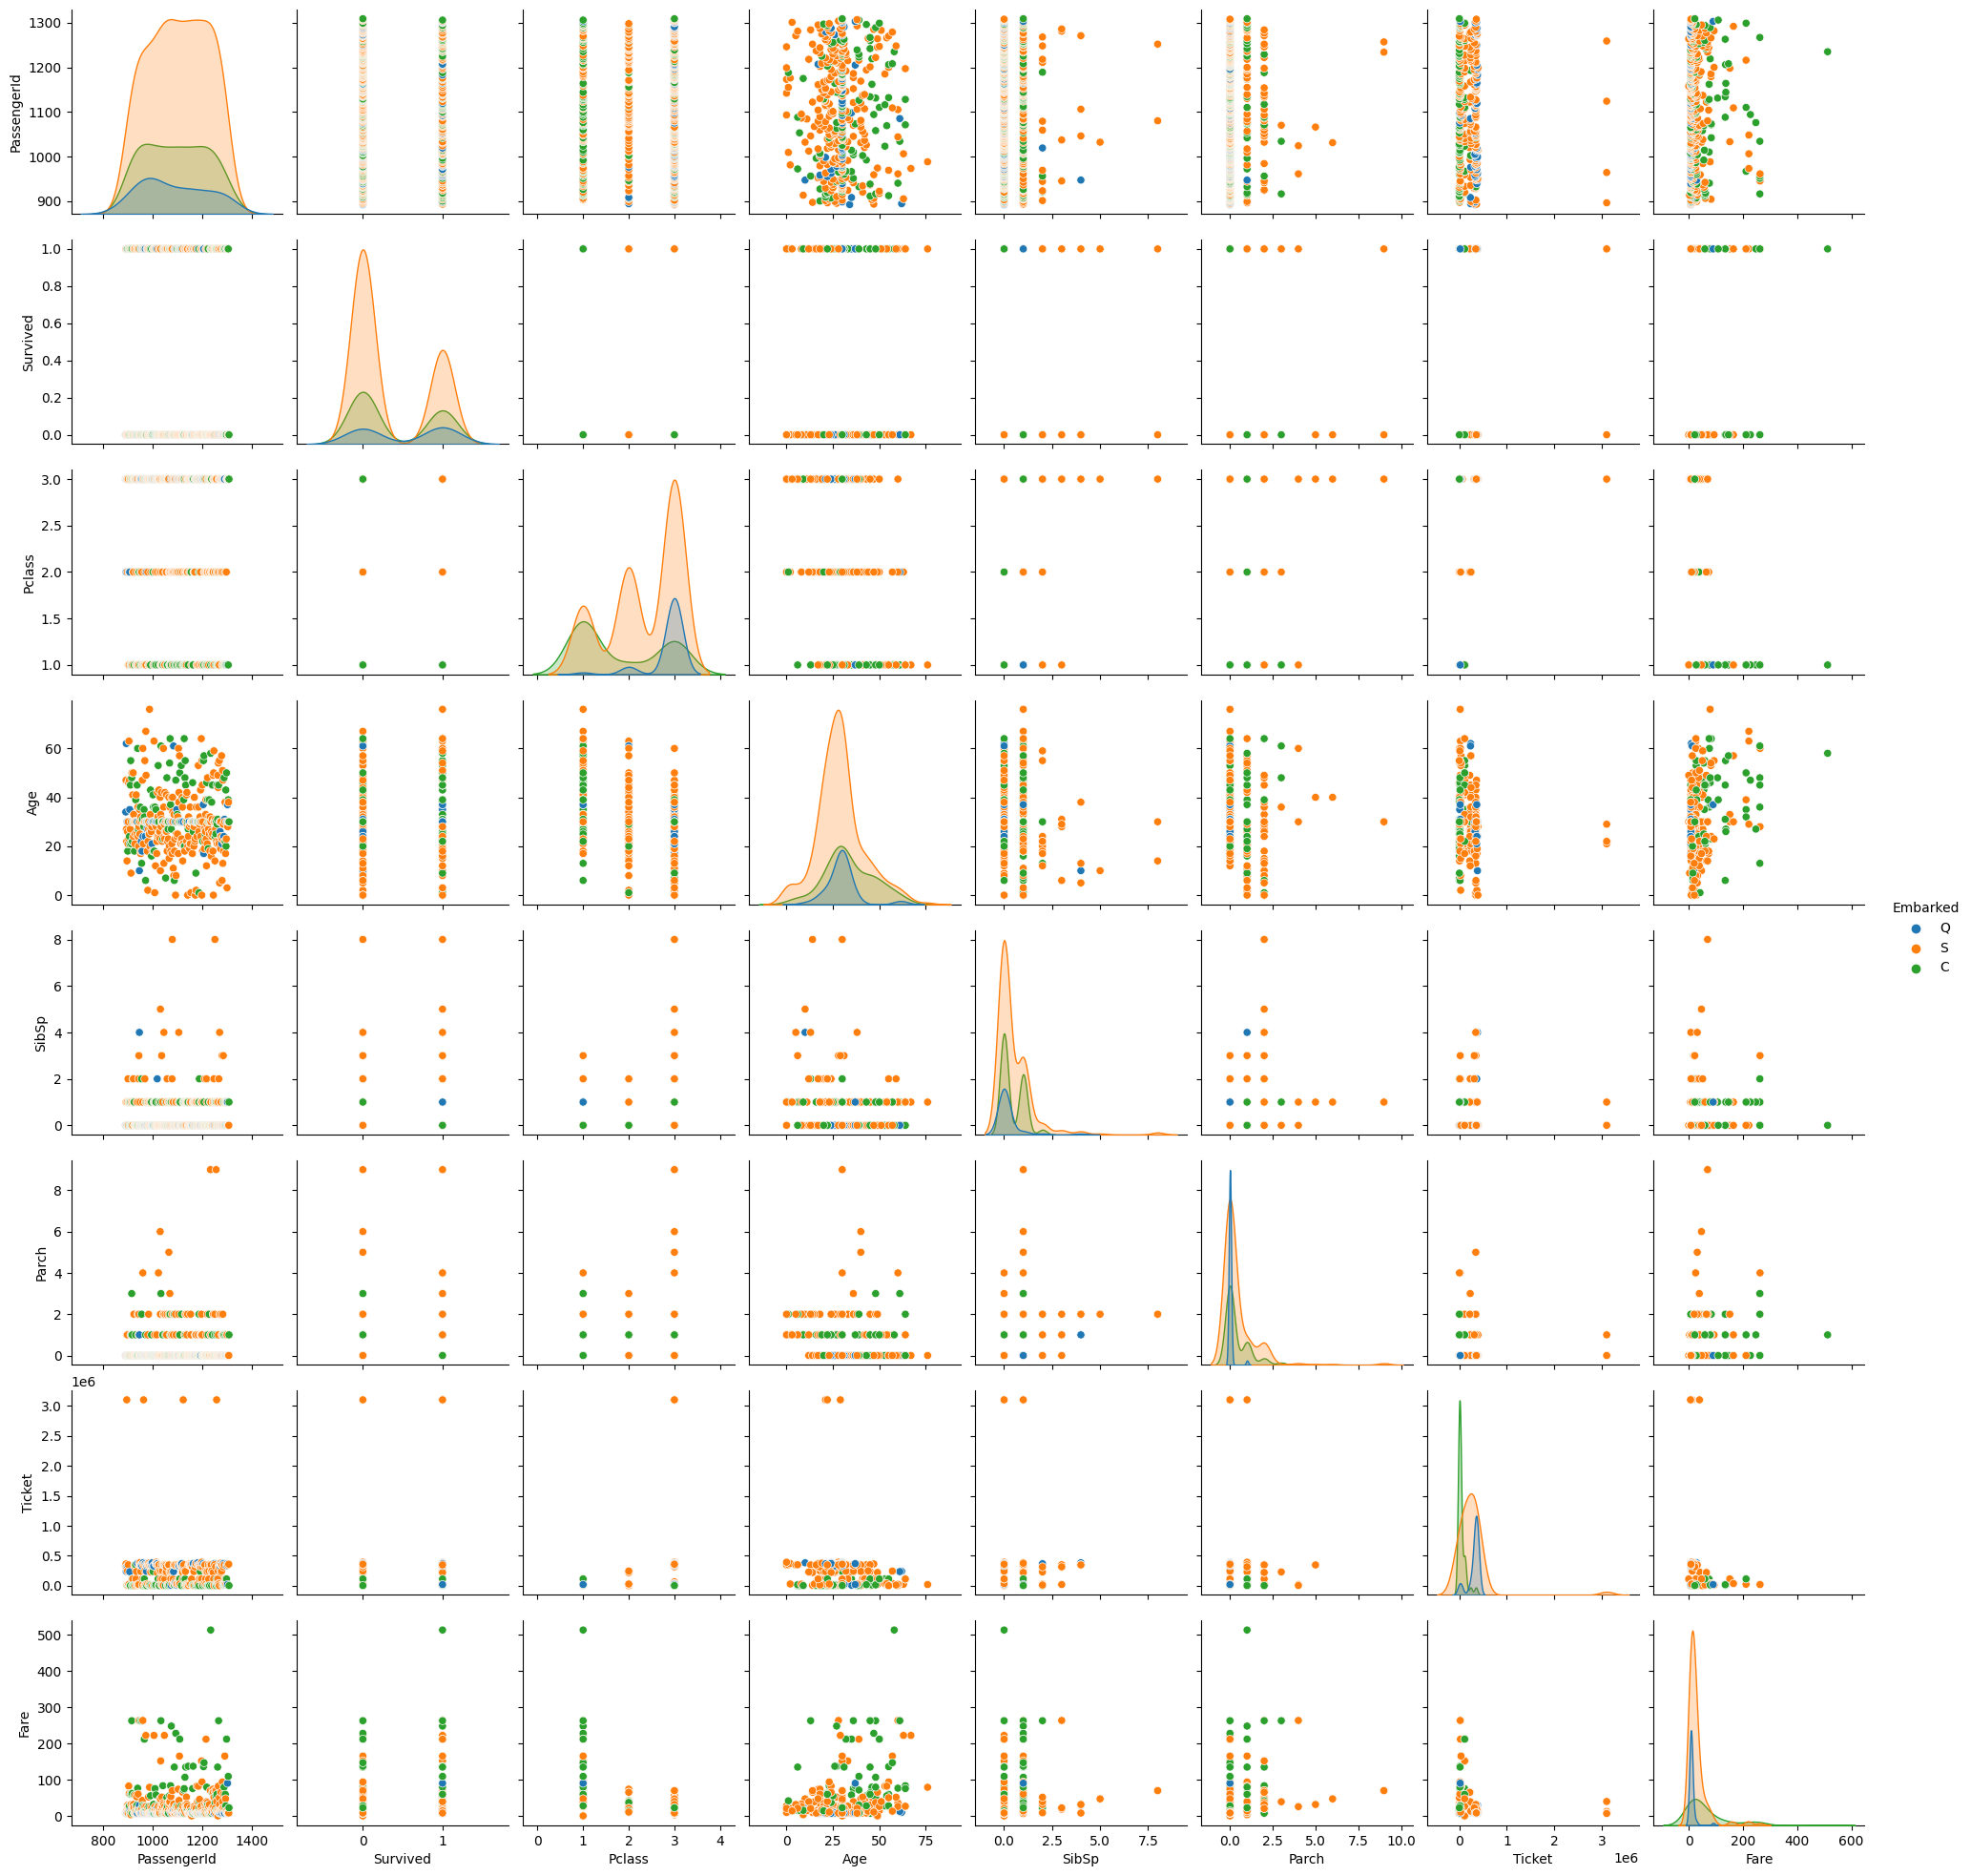

In [25]:
sns.pairplot(Test, hue='Embarked')


In [26]:
Test2=Test

In [27]:
Test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911.0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298.0,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,NaN,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,NaN,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,NaN,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309.0,8.0500,S


In [28]:
Test2 = Test2.drop(columns=['PassengerId', 'Name',  'Ticket'])


In [29]:
Test2['Embarked'] = Test2['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
Test2['Sex'] = Test2['Sex'].map( {'female': 1,'male':0}).astype(int)

In [30]:
Test2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7.8292,0
1,1,3,1,47,1,0,7.0000,1
2,0,2,0,62,0,0,9.6875,0
3,0,3,0,27,0,0,8.6625,1
4,1,3,1,22,1,1,12.2875,1


In [31]:
Train = Test2.drop(['Survived'], axis=1)
Test = Test2.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [32]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [33]:
from sklearn.metrics import accuracy_score, r2_score
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy Score:", LRAcc)
print("R-squared Score:", r2)

Accuracy Score: 0.9285714285714286
R-squared Score: 0.8823254727994396


#  BY:Menna Elminshawy